## Train a simple convnet on the Fashion MNIST dataset

In [0]:
#Import tensorflow
try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [10]:
#Training dataset shape
x_train.shape

(60000, 28, 28)

In [11]:
#Testing dataset shape
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [12]:
#Find the dimension of an image
x_train[0].shape

(28, 28)

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train / 255

In [0]:
x_test = x_test / 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#This will be done during model building

### Import the necessary layers from keras to build the model

### Build a model 

** with 2 Conv layers having `32 3*3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2359424   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
______________________________________________

In [0]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [26]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=32,
          callbacks=[callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3776 - accuracy: 0.8637 - val_loss: 0.2917 - val_accuracy: 0.8967
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2375 - accuracy: 0.9119 - val_loss: 0.2462 - val_accuracy: 0.9098
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1721 - accuracy: 0.9351 - val_loss: 0.2370 - val_accuracy: 0.9166
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1238 - accuracy: 0.9535 - val_loss: 0.2701 - val_accuracy: 0.9114
Epoch 5/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0847 - accuracy: 0.9683 - val_loss: 0.2731 - val_accuracy: 0.9151
Epoch 6/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0599 - accuracy: 0.9780 - val_loss: 0.3193 - val_accuracy: 0.9177
Epoch 7/10
60000/60000 [=========================

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dropout (Dropout)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               5

In [30]:
#Train the model
model.fit(x_train,y_train,          
          validation_data=(x_test,y_test),
          epochs=10,
          batch_size=32,
          callbacks=[callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 109us/sample - loss: 0.3941 - accuracy: 0.8574 - val_loss: 0.2920 - val_accuracy: 0.8928
Epoch 2/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.2614 - accuracy: 0.9039 - val_loss: 0.2734 - val_accuracy: 0.8984
Epoch 3/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.2137 - accuracy: 0.9209 - val_loss: 0.2324 - val_accuracy: 0.9161
Epoch 4/10
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1840 - accuracy: 0.9324 - val_loss: 0.2313 - val_accuracy: 0.9174
Epoch 5/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.1527 - accuracy: 0.9429 - val_loss: 0.2225 - val_accuracy: 0.9248
Epoch 6/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.1283 - accuracy: 0.9524 - val_loss: 0.2387 - val_accuracy: 0.9220
Epoch 7/10
60000/60000 [==========================

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
#ImageDataGenerator declaration 
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True)



In [0]:
import numpy as np



In [0]:
x_train = np.asarray(x_train).reshape((len(x_train), 28, 28, 1))


In [0]:
x_test = np.asarray(x_test).reshape((len(x_test), 28, 28, 1))


In [0]:
img_generator.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

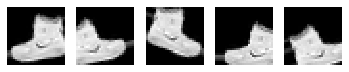

In [44]:
from matplotlib import pyplot as plt
gen = img_generator.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [0]:
train_generator = img_generator.flow(x_train,y_train, batch_size=64)
test_generator = img_generator.flow(x_test,y_test, batch_size=64)

In [0]:
#Clear any existing model in memory
tf.keras.backend.clear_session()

#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()

#Reshape data from 2D (28,28) to 3D (28, 28, 1)
#model.add(tf.keras.layers.Reshape((28,28,1),input_shape=(28,28,)))
#model.add(Dense(32, input_shape=(16,)))

#Add first convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu',input_shape=(28,28,1,)))

#Add second convolutional layer
model.add(tf.keras.layers.Conv2D(32, #Number of filters 
                                 kernel_size=(3,3), #Size of the filter
                                 activation='relu'))

#Add MaxPooling layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add another dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Flatten the output
model.add(tf.keras.layers.Flatten())

#Dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))

#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [82]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

### Run the above model using fit_generator()

In [84]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch = 60000//64,
                    validation_data=test_generator,
                    validation_steps = 10000//64)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 937 steps, validate for 156 steps
Epoch 1/10
937/937 [==============================] - 16s 17ms/step - loss: 0.4157 - accuracy: 0.8446 - val_loss: 0.4333 - val_accuracy: 0.8434
Epoch 2/10
937/937 [==============================] - 16s 17ms/step - loss: 0.4089 - accuracy: 0.8466 - val_loss: 0.4103 - val_accuracy: 0.8521
Epoch 3/10
937/937 [==============================] - 15s 17ms/step - loss: 0.4027 - accuracy: 0.8487 - val_loss: 0.4030 - val_accuracy: 0.8482
Epoch 4/10
937/937 [==============================] - 16s 17ms/step - loss: 0.3958 - accuracy: 0.8528 - val_loss: 0.4003 - val_accuracy: 0.8538
Epoch 5/10
937/937 [==============================] - 16s 17ms/step - loss: 0.3895 - accuracy: 0.8549 - val_loss: 0.3850 - val_accuracy: 0.8593
Epoch 6/10
937/937 [==============================] - 16s 17ms/step - loss: 0.3880 - accuracy: 0.8549 - val_loss: 0.3949 - val_accuracy: 0.8570
Epoch 7/10
937/937 [======================

###  Report the final train and validation accuracy

In [86]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 78us/sample - loss: 0.3326 - accuracy: 0.8833


[0.3326182222247124, 0.8833]

In [0]:
#Model Accuracy is 0.8833

## **DATA AUGMENTATION ON CIFAR10 DATASET**

1.   List item

1.   List item
2.   List item


2.   List item



One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [90]:
(x_cifar_train, y_cifar_train), (x_cifar_test, y_cifar_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
#ImageDataGenerator declaration 
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True)

In [0]:
x_cifar_train = x_cifar_train / 255
x_cifar_test = x_cifar_test / 255

### **Prepare/fit the generator.**

In [0]:
train_gen = img_generator.flow(x_cifar_train, batch_size=64)
test_gen = img_generator.flow(x_cifar_test, batch_size=64)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

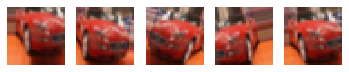

In [98]:
from matplotlib import pyplot as plt
gen = img_generator.flow(x_cifar_train[5:6], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()